In [1]:
### Load libraries -------
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numba
import math
from datetime import datetime
import numpy as np
import seaborn as sns
from dtaidistance import dtw, clustering
from dtaidistance import dtw_visualisation as dtwvis
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Pandas parameters
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 2000)
#pd.set_option('display.max_columns', 500)

In [2]:
### Define out paths ------

# check if out path exists, if it does not exists add the path
if not os.path.exists('/Users/hannahfrank/desktop/conflict_escalation_out'):
    os.makedirs('/Users/hannahfrank/desktop/conflict_escalation_out')

# add subfolders for the out path
out_paths = {
    "desciptive_plots_outcome": '/Users/hannahfrank/desktop/conflict_escalation_out/plots',
    "data": '/Users/hannahfrank/desktop/conflict_escalation_out/data'
}

for key, val in out_paths.items():
    if not os.path.exists(val):
        os.makedirs(val)
        
out_paths["data"]

'/Users/hannahfrank/desktop/conflict_escalation_out/data'

In [3]:
### Load data -------
ucdp = pd.read_csv(os.path.join(out_paths["data"], 
                                "ucdp.csv"))
ucdp.head(3)

,year_month,country_id,best,high,low,year,country
0,1989-01,700,691,1122,684,1989,Afghanistan
1,1989-02,700,160,160,41,1989,Afghanistan
2,1989-03,700,1744,6045,516,1989,Afghanistan


In [4]:
### Import time series -----
ts_dict = open("ucdp_time_series.pkl", "rb")
ts_ucdp = pickle.load(ts_dict)
ts_ucdp['Afghanistan, 1997']

array([  69,  182,  243,  191, 1553,  605,  177,  210,  383,  425,   58,
         98])

In [5]:
### Load cost matrix --------
ds_df = pd.read_csv(os.path.join(out_paths["data"], 
                                 "ucdp_dtw_matrix.csv"), index_col = [0])
ds_df.loc[["Afghanistan, 2019"]]

,"Afghanistan, 1989","Afghanistan, 1990","Afghanistan, 1991","Afghanistan, 1992","Afghanistan, 1993","Afghanistan, 1994","Afghanistan, 1995","Afghanistan, 1996","Afghanistan, 1997","Afghanistan, 1998",...,"Yemen (North Yemen), 2010","Yemen (North Yemen), 2011","Yemen (North Yemen), 2012","Yemen (North Yemen), 2013","Yemen (North Yemen), 2014","Yemen (North Yemen), 2015","Yemen (North Yemen), 2016","Yemen (North Yemen), 2017","Yemen (North Yemen), 2018","Yemen (North Yemen), 2019"
"Afghanistan, 2019",5658.292145,8188.951764,8163.549596,5595.295345,7126.779778,6454.196774,6673.046456,7770.34877,6091.977676,5091.314172,...,8620.207596,8323.667401,7930.132281,8510.821641,8153.284737,6422.971509,7900.114746,8028.794928,7345.734068,8219.048668


In [6]:
### PCA on cost matrix -------
x = StandardScaler().fit_transform(ds_df)
pca = PCA(n_components=5)
pca_out = pca.fit_transform(x)

df_pca = pd.DataFrame(data = pca_out, 
                      columns = ['pc_1', 
                                 'pc_2',
                                 'pc_3',
                                 'pc_4',
                                 'pc_5'],
                      index=ds_df.index.copy())
df_pca.head(3)

,pc_1,pc_2,pc_3,pc_4,pc_5
"Afghanistan, 1989",147.041711,-33.261361,-6.752365,-6.428810,-2.510076
"Afghanistan, 1990",33.733181,-19.427598,3.048564,0.247594,-3.633430
"Afghanistan, 1991",30.546938,-17.378307,5.597979,1.676201,0.805165


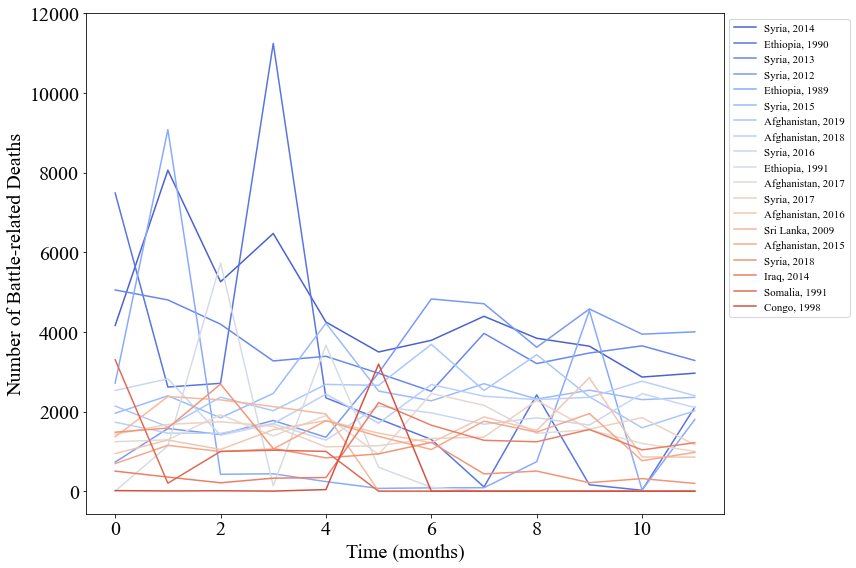

In [7]:
### PC 1 -------
pc1 = df_pca.sort_values("pc_1", 
                   key=abs, 
                   ascending=False)[:20].index

pc1_subset = {key: ts_ucdp[key] for key in pc1}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc1, range(0,19)): 
    ax.plot(pc1_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1, 1),
          prop={'size': 11, 
                'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_01"), 
                         dpi=200)     

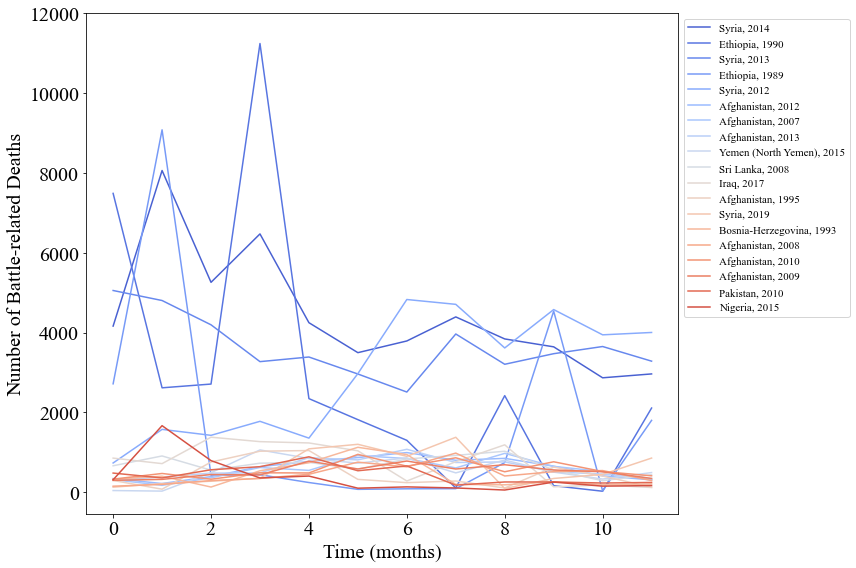

In [8]:
### PC 2 -------
pc2 = df_pca.sort_values("pc_2", 
                   key=abs, 
                   ascending=False)[:20].index

pc2_subset = {key: ts_ucdp[key] for key in pc2}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc2, range(0,19)): 
    ax.plot(pc2_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1, 1),
          prop={'size': 11, 
         'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_02"), 
                         dpi=200)     

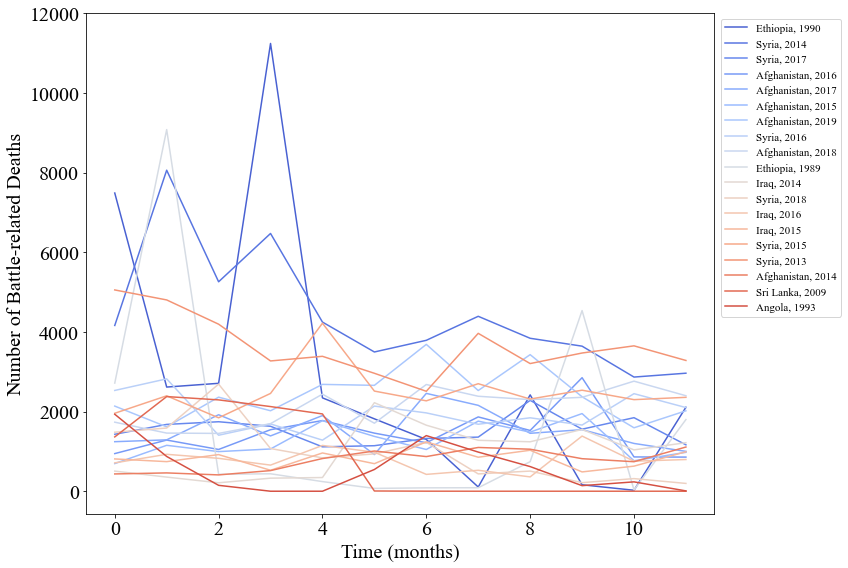

In [9]:
### PC 3 -------
pc3 = df_pca.sort_values("pc_3", 
                   key=abs, 
                   ascending=False)[:20].index

pc3_subset = {key: ts_ucdp[key] for key in pc3}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc3, range(0,19)): 
    ax.plot(pc3_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1.21, 1),
          prop={'size': 11, 
                'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_03"), 
                         dpi=200)     

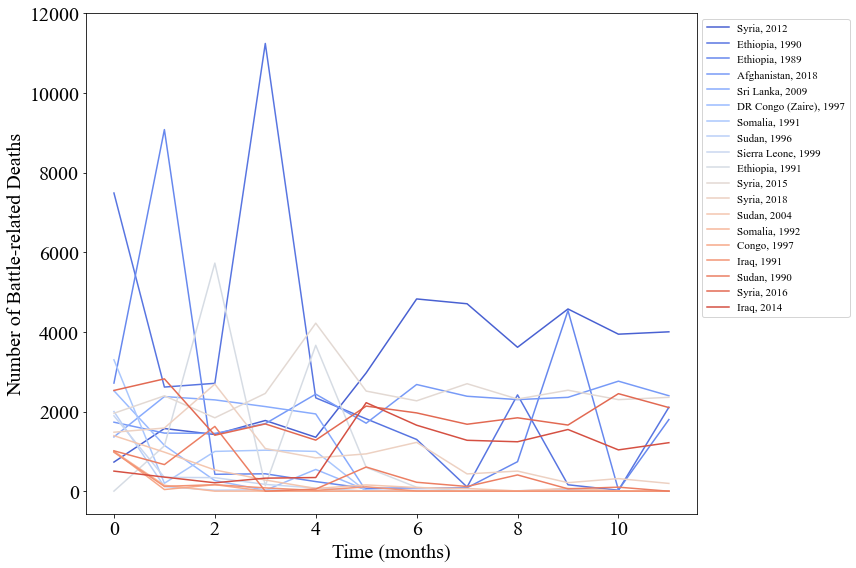

In [10]:
### PC 4 -------
pc4 = df_pca.sort_values("pc_4", 
                   key=abs, 
                   ascending=False)[:20].index

pc4_subset = {key: ts_ucdp[key] for key in pc4}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc4, range(0,19)): 
    ax.plot(pc4_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1, 1),
          prop={'size': 11, 
                'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_04"), 
                         dpi=200)     

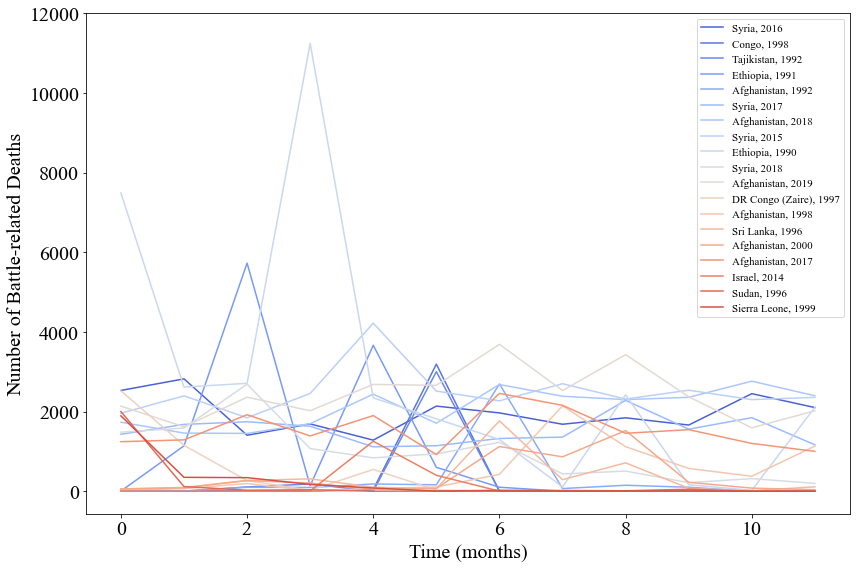

In [11]:
### PC 5 -------
pc5 = df_pca.sort_values("pc_5", 
                   key=abs, 
                   ascending=False)[:20].index

pc5_subset = {key: ts_ucdp[key] for key in pc5}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc5, range(0,19)): 
    ax.plot(pc5_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1, 1),
          prop={'size': 11, 
                'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_05"), 
                         dpi=200)     